<a href="https://colab.research.google.com/github/umeshpandey12195/fastai/blob/master/%20Emergency_vs_Non_Emergency_Vehicle/Emergency_vs_Non_Emergency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import all the required library
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.vision import *
from fastai.metrics import *

import warnings
warnings.filterwarnings('ignore')

from fastai.imports import *


In [ ]:
#Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Select the path 
path = Path('/content/drive/My Drive/EmergencyVSNon-Emergency_VehicalClassification (1)/')

In [ ]:
path.ls()

[PosixPath('/content/drive/My Drive/EmergencyVSNon-Emergency_VehicalClassification (1)/test_images_actual_label.csv'),
 PosixPath('/content/drive/My Drive/EmergencyVSNon-Emergency_VehicalClassification (1)/test_images'),
 PosixPath('/content/drive/My Drive/EmergencyVSNon-Emergency_VehicalClassification (1)/train_images'),
 PosixPath('/content/drive/My Drive/EmergencyVSNon-Emergency_VehicalClassification (1)/.ipynb_checkpoints'),
 PosixPath('/content/drive/My Drive/EmergencyVSNon-Emergency_VehicalClassification (1)/result_resnet34.csv'),
 PosixPath('/content/drive/My Drive/EmergencyVSNon-Emergency_VehicalClassification (1)/result_resnet50.csv'),
 PosixPath('/content/drive/My Drive/EmergencyVSNon-Emergency_VehicalClassification (1)/result_densenet169.csv'),
 PosixPath('/content/drive/My Drive/EmergencyVSNon-Emergency_VehicalClassification (1)/result_densenet121.csv'),
 PosixPath('/content/drive/My Drive/EmergencyVSNon-Emergency_VehicalClassification (1)/models'),
 PosixPath('/content/dri

##Looking at the data

In [ ]:
#Create a Image Data Bunch
np.random.seed(1)
data = ImageDataBunch.from_folder(path,train='train_images',test='test_images',ds_tfms=get_transforms(),valid_pct=0.2, size=224,seed =1,bs=64
                                  ).normalize(imagenet_stats)

In [ ]:
#Check the output of image databunch
data

ImageDataBunch;

Train: LabelList (1317 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
emergency,emergency,emergency,emergency,emergency
Path: /content/drive/My Drive/EmergencyVSNon-Emergency_VehicalClassification (1);

Valid: LabelList (329 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
emergency,non_emergency,non_emergency,emergency,non_emergency
Path: /content/drive/My Drive/EmergencyVSNon-Emergency_VehicalClassification (1);

Test: LabelList (706 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: /content/drive/My Drive/EmergencyVSNon-Emergency_VehicalClassification (1)

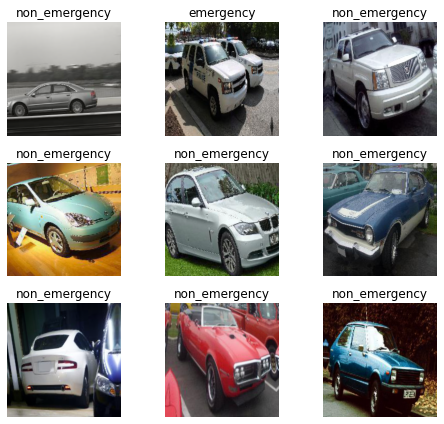

In [ ]:
#Show the image with the label
data.show_batch(rows=3, figsize=(7,6))

In [ ]:
#Print the classes
print(data.classes)
len(data.classes),data.c

['emergency', 'non_emergency']


(2, 2)

There are two classes in the data.Emergency and Non Emergency

##Training: resnet34 and its result

In [ ]:
#Learn the basic resnet34 model
learn_resnet34 = cnn_learner(data,models.resnet34,metrics=accuracy)

In [ ]:
#Print Model to check the model summary
learn_resnet34.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [ ]:
#Fit the model with with 10 no of epoch
learn_resnet34.fit_one_cycle(10)

epoch,train_loss,valid_loss,accuracy,time
0,0.922314,0.288958,0.911854,00:12
1,0.592420,0.243818,0.927052,00:12
2,0.450617,0.236208,0.936170,00:12
3,0.344401,0.234924,0.936170,00:12
4,0.292133,0.227889,0.927052,00:12
5,0.240601,0.199824,0.933131,00:12
6,0.198974,0.192064,0.942249,00:12
7,0.168206,0.182376,0.939210,00:12
8,0.140436,0.189183,0.939210,00:12
9,0.130942,0.198345,0.936170,00:12


Result


1.   The Model will have the accuracy of 93 % at 10 epoch with low train and validaiton loss



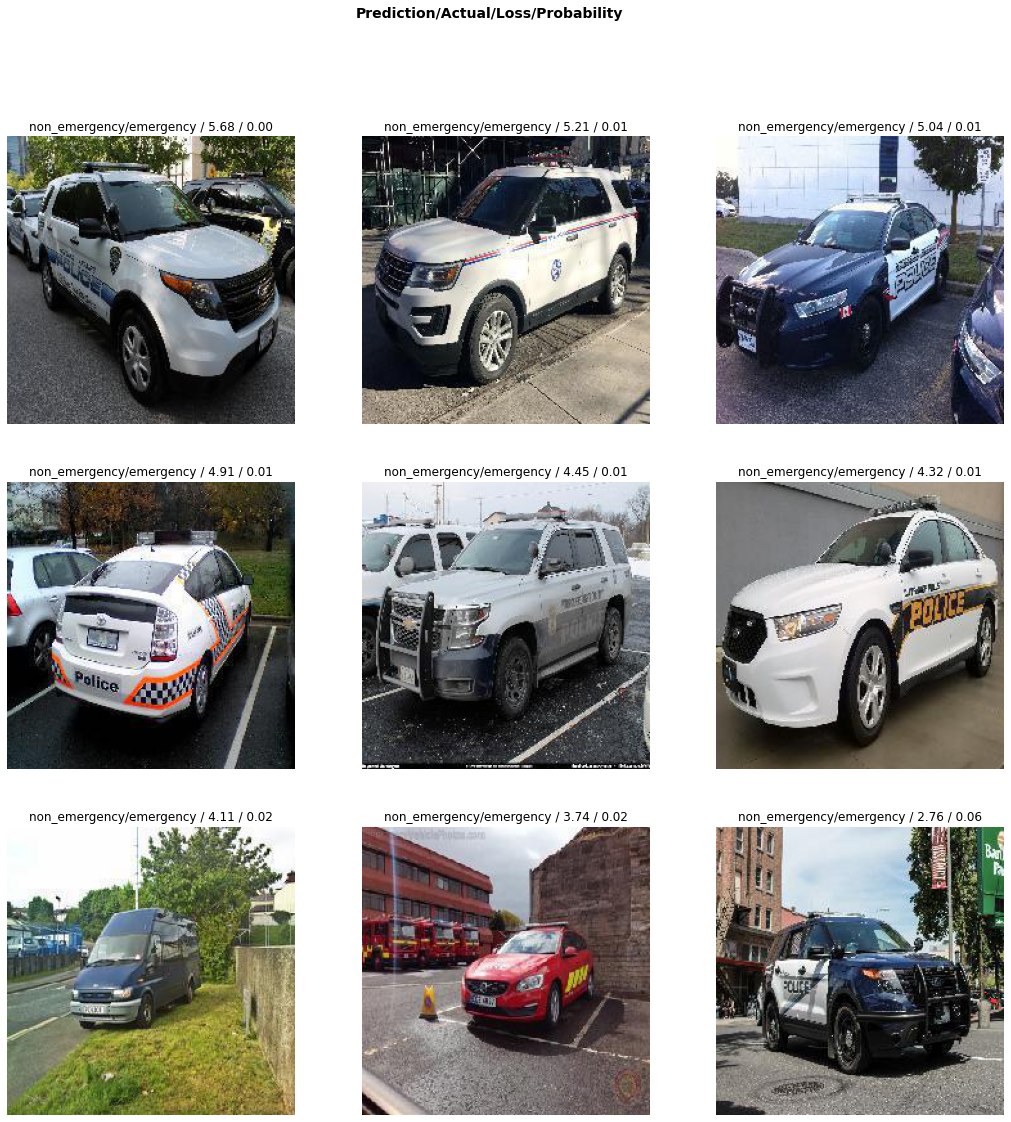

In [ ]:
# interpret the result
interp_resnet34 = ClassificationInterpretation.from_learner(learn_resnet34)
interp_resnet34.plot_top_losses(9, figsize=(18,18))

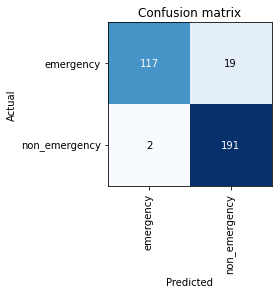

In [ ]:
#Print the confusion matrix
interp_resnet34.plot_confusion_matrix( )

Result

1.From the above confusion matrix 19 Emergency Vehichle is predicted as non emergency and 2 non_emergency is predicted as emergency

##Prediction on Test Data

In [ ]:
p1=learn_resnet34.predict(data.test_ds.x[0])
print(p1)
print("label",int(p1[0]))
print("label",str(p1[0]))



(Category tensor(1), tensor(1), tensor([2.4570e-05, 9.9998e-01]))
label 1
label non_emergency


So from the result non_emergency has label =1 and emergency has label =0

In [ ]:
## Prediction on the test data
preds = []
filename = []
for i in range(0,706):
    f = str(learn_resnet34.data.test_ds.items[i]).split('/')[-1]
    p = learn_resnet34.predict(data.test_ds.x[i])
    filename.append(f)    
    preds.append(int(p[0]))

In [ ]:
#Create dataframe from the predicted  value
df=pd.DataFrame(list(zip(filename,preds)),columns=['pred_image_name','pred_value'])

In [ ]:
#Import the actual value of dataframe
df1 = pd.read_csv(path/'test_images_actual_label.csv', header='infer')
df1.head()
##in the given csv emergency has label =1 and non emergency has label =0

,image_names,emergency_or_not
0,100.jpg,1
1,105.jpg,1
2,109.jpg,1
3,111.jpg,1
4,115.jpg,1


In [ ]:
#Create a new dataframe with predicted and expected output
result_resnet34 = pd.merge (df1,df,left_on='image_names', right_on='pred_image_name')

In [ ]:
#Save the model and result
learn_resnet34.save(path/'Image'/'learn_resnet34')
result_resnet34.to_csv(path/'Image'/'result_resnet34.csv')

##Train and predict the test data with pretrained Resnet50

epoch,train_loss,valid_loss,accuracy,time
0,0.526954,0.315668,0.920973,00:15
1,0.433572,0.273637,0.911854,00:15
2,0.308459,0.224118,0.927052,00:15
3,0.234651,0.217531,0.930091,00:15
4,0.189793,0.210360,0.930091,00:15


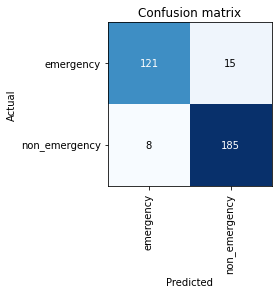

In [ ]:
#Create model with resnet50
learn_resnet50 = cnn_learner(data, models.resnet50, metrics=accuracy)
learn_resnet50.fit_one_cycle(5)
interp_resnet50 = ClassificationInterpretation.from_learner(learn_resnet50)
interp_resnet50.plot_confusion_matrix( )
preds = []
filename = []
for i in range(0,706):
    f = str(learn_resnet50.data.test_ds.items[i]).split('/')[-1]
    p = learn_resnet50.predict(data.test_ds.x[i])
    filename.append(f)    
    preds.append(int(p[0])) 
df2=pd.DataFrame(list(zip(filename,preds)),columns=['pred_image_name','pred_value'])
result_resnet50 = pd.merge (df1,df2,left_on='image_names', right_on='pred_image_name')
learn_resnet50.save(path/'Image'/'learn_resnet50')
result_resnet50.to_csv(path/'Image'/'result_resnet50.csv')

Result

1.   The best Accuracy wih resnet 50 model is 93% with low train and validaition loss
2.   From the above confusion matrix 15 Emergency Vehichle is predicted as non emergency and 8 non_emergency is predicted as emergency



##Train and predict the test data with pretrained Densenet169

Downloading: "https://download.pytorch.org/models/densenet169-b2777c0a.pth" to /root/.cache/torch/checkpoints/densenet169-b2777c0a.pth


epoch,train_loss,valid_loss,accuracy,time
0,0.574597,0.191994,0.933131,00:19
1,0.363208,0.212272,0.927052,00:16
2,0.265774,0.203830,0.911854,00:17
3,0.209022,0.171911,0.945289,00:17
4,0.159732,0.164511,0.948328,00:17


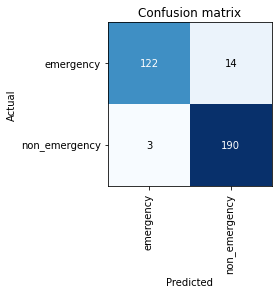

In [ ]:
#Create model with densenet169
learn_densenet169= cnn_learner(data, models.densenet169, metrics=accuracy)
learn_densenet169.fit_one_cycle(5)
interp_densenet169 = ClassificationInterpretation.from_learner(learn_densenet169)
interp_densenet169.plot_confusion_matrix( )
preds = []
filename = []
for i in range(0,706):
    f = str(learn_densenet169.data.test_ds.items[i]).split('/')[-1]
    p = learn_densenet169.predict(data.test_ds.x[i])
    filename.append(f)    
    preds.append(int(p[0]))
  
df3=pd.DataFrame(list(zip(filename,preds)),columns=['pred_image_name','pred_value'])
result_densenet169 = pd.merge (df1,df3,left_on='image_names', right_on='pred_image_name')
learn_densenet169.save(path/'Image'/'learn_densenet169')
result_densenet169.to_csv(path/'Image'/'result_densenet169.csv')

Result

1.   The best Accuracy wih Densenet169 model is 94.8% with low train and validaition loss
2.   From the above confusion matrix 14 Emergency Vehichle is predicted as non emergency and 3 non_emergency is predicted as emergency


##Train and predict the test data with pretrained Densenet121

epoch,train_loss,valid_loss,accuracy,time
0,0.634986,0.239205,0.954407,00:15
1,0.448205,0.127624,0.960486,00:15
2,0.311443,0.162950,0.945289,00:16
3,0.240898,0.151841,0.936170,00:15
4,0.189616,0.137635,0.945289,00:15


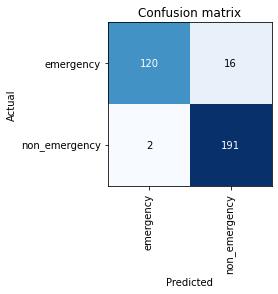

In [ ]:
#Create model with densenet121
learn_densenet121= cnn_learner(data, models.densenet121, metrics=accuracy)
learn_densenet121.fit_one_cycle(5)
interp_densenet121 = ClassificationInterpretation.from_learner(learn_densenet121)
interp_densenet121.plot_confusion_matrix( )
preds = []
filename = []
for i in range(0,706):
    f = str(learn_densenet121.data.test_ds.items[i]).split('/')[-1]
    p = learn_densenet121.predict(data.test_ds.x[i])
    filename.append(f)    
    preds.append(int(p[0]))
  
df4=pd.DataFrame(list(zip(filename,preds)),columns=['pred_image_name','pred_value'])
result_densenet121 = pd.merge (df1,df4,left_on='image_names', right_on='pred_image_name')
learn_densenet121.save(path/'Image'/'learn_densenet121')
result_densenet121.to_csv(path/'Image'/'result_densenet121.csv')

Result

1.   The best Accuracy wih Densenet169 model is 94.5% with low train and validaition loss
2.   From the above confusion matrix 16 Emergency Vehichle is predicted as non emergency and 2 non_emergency is predicted as emergency

#Unfreeze the layer and tune the learning rate for resnet_50 and train the model

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


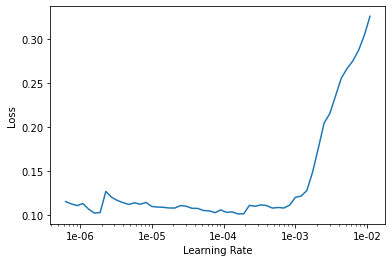

In [ ]:
#Lets unfreeze the layer and tune the learning rate for resnet_50
learn_resnet50.unfreeze()
learn_resnet50.lr_find()
learn_resnet50.recorder.plot()

Result

1.   List item
2.   List item



epoch,train_loss,valid_loss,accuracy,time
0,0.097081,0.208209,0.933131,00:16
1,0.083280,0.169240,0.936170,00:16
2,0.081710,0.149980,0.948328,00:17
3,0.081897,0.211611,0.933131,00:16
4,0.076481,0.157130,0.960486,00:16
5,0.065467,0.150822,0.954407,00:16
6,0.055341,0.169237,0.948328,00:16
7,0.045576,0.177729,0.948328,00:16
8,0.034514,0.171641,0.948328,00:16
9,0.032196,0.167794,0.948328,00:16


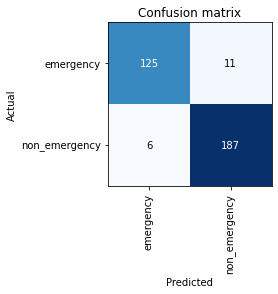

In [ ]:
learn_resnet50.fit_one_cycle(10,max_lr=slice(1e-6,1e-3))
interp = ClassificationInterpretation.from_learner(learn_resnet50)
interp.plot_confusion_matrix( )
preds = []
filename = []
for i in range(0,706):
    f = str(learn_resnet50.data.test_ds.items[i]).split('/')[-1]
    p = learn_resnet50.predict(data.test_ds.x[i])
    filename.append(f)    
    preds.append(int(p[0]))  
df5=pd.DataFrame(list(zip(filename,preds)),columns=['pred_image_name','pred_value'])
result_resnet50 = pd.merge (df1,df5,left_on='image_names', right_on='pred_image_name')
result_resnet50.to_csv(path/'Image'/'learn_resnet50_updated.csv')
learn_resnet50.save(path/'Image'/'learn_resnet50_updated')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


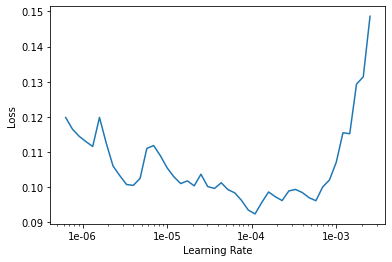

In [ ]:
#Lets unfreeze the layer and tune the learning rate for densenet121
learn_densenet121.unfreeze()
learn_densenet121.lr_find()
learn_densenet121.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,0.115284,0.126184,0.951368,00:17
1,0.119653,0.111956,0.954407,00:17
2,0.107315,0.113286,0.957447,00:17
3,0.089396,0.098201,0.960486,00:17
4,0.084430,0.099287,0.960486,00:17


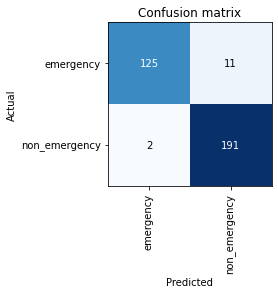

In [ ]:
learn_densenet121.fit_one_cycle(5,max_lr=slice(1e-6,1e-3))
interp = ClassificationInterpretation.from_learner(learn_densenet121)
interp.plot_confusion_matrix( )
preds = []
filename = []
for i in range(0,706):
    f = str(learn_densenet121.data.test_ds.items[i]).split('/')[-1]
    p = learn_densenet121.predict(data.test_ds.x[i])
    filename.append(f)    
    preds.append(int(p[0]))  
df6=pd.DataFrame(list(zip(filename,preds)),columns=['pred_image_name','pred_value'])
result_densenet121 = pd.merge (df1,df6,left_on='image_names', right_on='pred_image_name')
result_densenet121.to_csv(path/'Image'/'learn_densenet121_updated.csv')
learn_densenet121.save(path/'Image'/'learn_densenet121_updated')

In [ ]:
## Densenet121 is giving highest accuracy of 96% on validation data with 11 incorrect emergency predicition and 2 non-emergency prediciton.

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


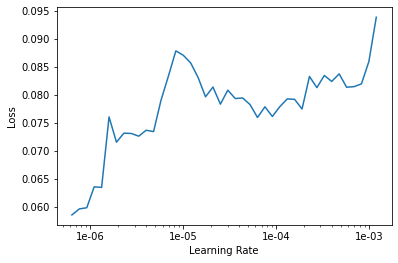

In [ ]:
#Lets unfreeze the layer and tune the learning rate for densenet121
learn_densenet169.unfreeze()
learn_densenet169.lr_find()
learn_densenet169.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,0.062214,0.154564,0.945289,00:19
1,0.060771,0.157202,0.954407,00:20
2,0.075164,0.180999,0.951368,00:20
3,0.061358,0.159418,0.948328,00:20
4,0.053360,0.157616,0.951368,00:20


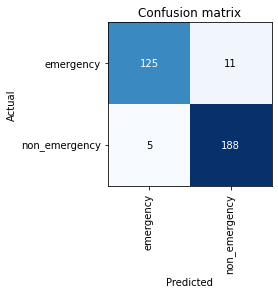

In [ ]:
learn_densenet169.fit_one_cycle(5,max_lr=slice(1e-6,1e-3))
interp = ClassificationInterpretation.from_learner(learn_densenet169)
interp.plot_confusion_matrix( )
preds = []
filename = []
for i in range(0,706):
    f = str(learn_densenet169.data.test_ds.items[i]).split('/')[-1]
    p = learn_densenet169.predict(data.test_ds.x[i])
    filename.append(f)    
    preds.append(int(p[0]))  
df7=pd.DataFrame(list(zip(filename,preds)),columns=['pred_image_name','pred_value'])
result_densenet169 = pd.merge (df1,df7,left_on='image_names', right_on='pred_image_name')
result_densenet169.to_csv(path/'Image'/'learn_densenet169_updated.csv')
learn_densenet169.save(path/'Image'/'learn_densenet169_updated')

In [ ]:
##Lets tune some hyperparameter with resnet50 model

In [ ]:
##Create a function that will return the accuracy
def fit_with(lr,wd,dp):
    
    # Create the model using a specified dropout and weight decay
    learn = cnn_learner(data, models.resnet50, metrics=accuracy,opt_func=optim.Adam, ps=dp,wd=wd)
    
    
    # Train the model for a specified number of epochs using a specified max learning rate
    learn.fit_one_cycle(1, max_lr=lr)
    
    # Plot the loss over time
    learn.recorder.plot_losses()
    
    # Save, print, and return the model's accuracy
    acc = float(learn.validate(learn.data.valid_dl)[1])
    
    print("Accuracy:" + str(acc*100))
    print("Best param","lr:",lr," wd:",wd,"dp:",dp)
    
    # The small change: we're only going to return the accuracy
    
    return acc

In [ ]:
#Define the hyperparmeter
lrs = [1e-3, 1e-4,1e-5,1e-6]
wds = [1e-2, 1e-3]
dps = [0.1, 0.3]

epoch,train_loss,valid_loss,accuracy,time
0,0.585958,0.298078,0.917933,00:15


Accuracy:91.79331064224243
Best param lr: 0.001  wd: 0.01 dp: 0.1


epoch,train_loss,valid_loss,accuracy,time
0,0.573581,0.286269,0.924012,00:15


Accuracy:92.40121841430664
Best param lr: 0.001  wd: 0.01 dp: 0.3


epoch,train_loss,valid_loss,accuracy,time
0,0.483886,0.378746,0.908815,00:15


Accuracy:90.88146090507507
Best param lr: 0.001  wd: 0.001 dp: 0.1


epoch,train_loss,valid_loss,accuracy,time
0,0.577457,0.381008,0.896657,00:15


Accuracy:89.66565132141113
Best param lr: 0.001  wd: 0.001 dp: 0.3


epoch,train_loss,valid_loss,accuracy,time
0,0.579362,0.281704,0.899696,00:15


Accuracy:89.96960520744324
Best param lr: 0.0001  wd: 0.01 dp: 0.1


epoch,train_loss,valid_loss,accuracy,time
0,0.582695,0.239983,0.905775,00:15


Accuracy:90.57750701904297
Best param lr: 0.0001  wd: 0.01 dp: 0.3


epoch,train_loss,valid_loss,accuracy,time
0,0.582790,0.268871,0.899696,00:15


Accuracy:89.96960520744324
Best param lr: 0.0001  wd: 0.001 dp: 0.1


epoch,train_loss,valid_loss,accuracy,time
0,0.562238,0.284331,0.887538,00:15


Accuracy:88.75380158424377
Best param lr: 0.0001  wd: 0.001 dp: 0.3


epoch,train_loss,valid_loss,accuracy,time
0,1.277976,0.785675,0.528875,00:15


Accuracy:52.887535095214844
Best param lr: 1e-05  wd: 0.01 dp: 0.1


epoch,train_loss,valid_loss,accuracy,time
0,1.119477,0.726526,0.613982,00:15


Accuracy:61.39817833900452
Best param lr: 1e-05  wd: 0.01 dp: 0.3


epoch,train_loss,valid_loss,accuracy,time
0,0.959220,0.737809,0.562310,00:15


Accuracy:56.23100399971008
Best param lr: 1e-05  wd: 0.001 dp: 0.1


epoch,train_loss,valid_loss,accuracy,time
0,0.908006,0.665123,0.647416,00:15


Accuracy:64.74164128303528
Best param lr: 1e-05  wd: 0.001 dp: 0.3


epoch,train_loss,valid_loss,accuracy,time
0,0.838397,0.782042,0.580547,00:15


Accuracy:58.05470943450928
Best param lr: 1e-06  wd: 0.01 dp: 0.1


epoch,train_loss,valid_loss,accuracy,time
0,1.209851,1.103423,0.437690,00:15


Accuracy:43.76899600028992
Best param lr: 1e-06  wd: 0.01 dp: 0.3


epoch,train_loss,valid_loss,accuracy,time
0,1.008782,1.026298,0.446809,00:15


Accuracy:44.68085169792175
Best param lr: 1e-06  wd: 0.001 dp: 0.1


epoch,train_loss,valid_loss,accuracy,time
0,1.126429,0.891690,0.544073,00:16


Accuracy:54.40729260444641
Best param lr: 1e-06  wd: 0.001 dp: 0.3


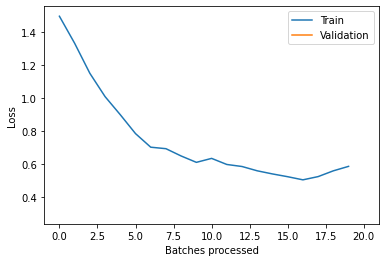

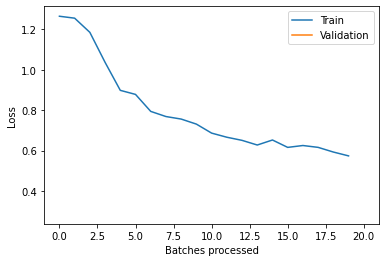

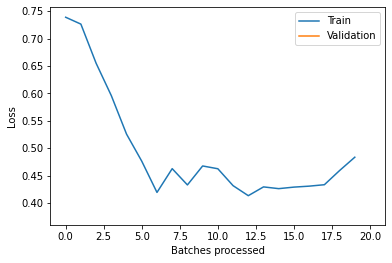

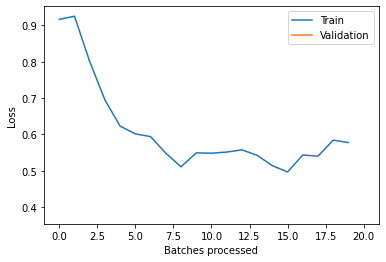

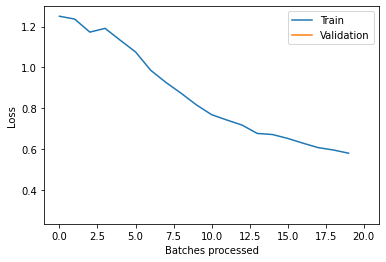

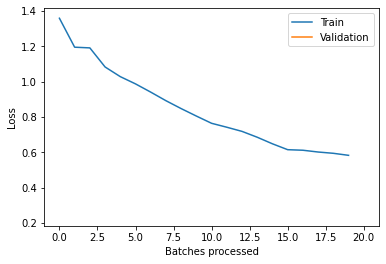

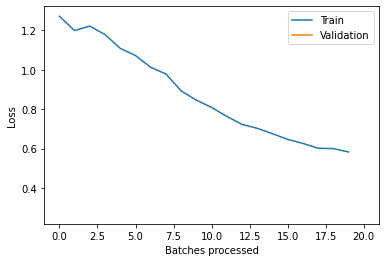

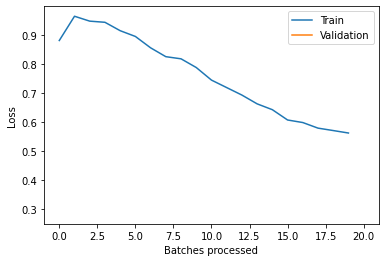

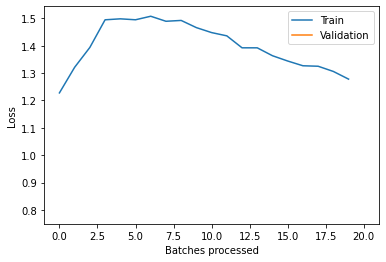

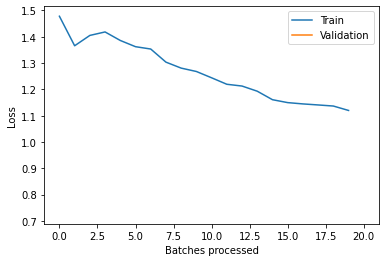

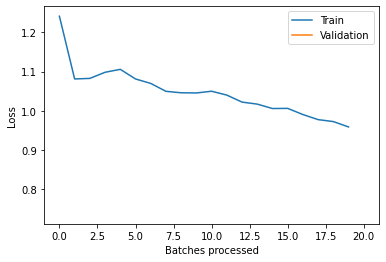

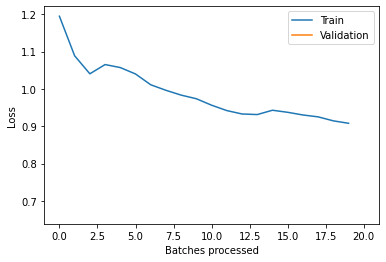

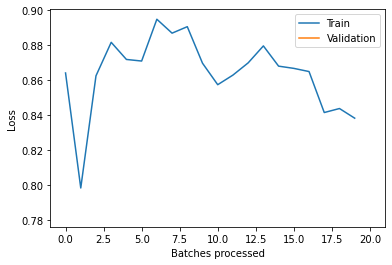

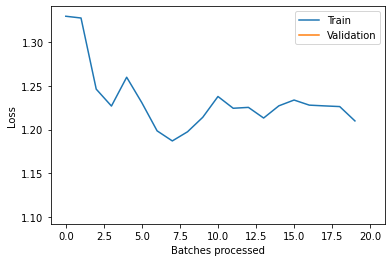

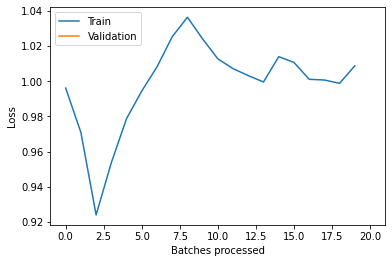

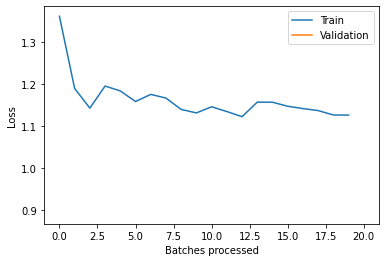

In [ ]:
max_acc = 0

for lr in lrs:
  for wd in wds:
    for dp in dps: 
      model = fit_with(lr,wd,dp)
    

In [ ]:
#The best param with highest accuracy is 
#Accuracy:92.40121841430664
#Best param lr: 0.001  wd: 0.01 dp: 0.3

epoch,train_loss,valid_loss,accuracy,time
0,0.525695,0.304763,0.920973,00:15
1,0.424848,0.292351,0.905775,00:15
2,0.320752,0.227552,0.936170,00:15
3,0.239532,0.176751,0.939210,00:15
4,0.177435,0.183271,0.942249,00:15


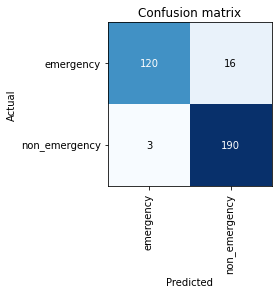

In [ ]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy,opt_func=optim.Adam, ps=0.3,wd=0.01)    
# Train the model for a specified number of epochs using a specified max learning rate
learn.fit_one_cycle(5, max_lr=0.001)
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix( )
learn.save(path/'Image'/'learn_resnet50_hypertuned')